# **Mini GlucoNet-MM Prototype**
### Multimodal Blood Glucose Forecasting with Attention-based Deep Learning

**Purpose:**  
A small research-oriented prototype inspired by the GlucoNet-MM framework for personalized blood glucose prediction.

**What this prototype demonstrates:**
- Multimodal healthcare time-series modeling (glucose, insulin, carbohydrates)
- Attention-based deep learning for temporal reasoning
- Short-term glucose forecasting
- Basic explainability using attention visualization

**Goal:**  
To practically explore multimodal and explainable AI methods for clinical decision-support systems in diabetes care.


In [1]:
!pip install pandas numpy matplotlib scikit-learn torch


In [2]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


In [3]:
# create synthetic multimodal glucose dataset
np.random.seed(42)

time_steps = 500

glucose = np.sin(np.linspace(0, 50, time_steps)) + np.random.normal(0, 0.1, time_steps)
insulin = np.random.uniform(0, 1, time_steps)
carbs = np.random.uniform(0, 1, time_steps)

data = pd.DataFrame({
    "glucose": glucose,
    "insulin": insulin,
    "carbs": carbs
})

data.head()


,glucose,insulin,carbs
0,0.049671,0.645917,0.871844
1,0.086206,0.570778,0.029247
2,0.263831,0.356097,0.825817
3,0.448397,0.986515,0.128870
4,0.366741,0.605775,0.335119


# **sample dataset**

In [4]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(data)

X = []
y = []

seq_len = 20

for i in range(len(scaled) - seq_len - 1):
    X.append(scaled[i:i+seq_len])
    y.append(scaled[i+seq_len, 0])  # predict glucose

X = np.array(X)
y = np.array(y)

X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)


# **Normalize data**

In [5]:
class AttentionGRU(nn.Module):
    def __init__(self, input_size=3, hidden_size=32):
        super().__init__()
        self.gru = nn.GRU(input_size, hidden_size, batch_first=True)
        self.attn = nn.Linear(hidden_size, 1)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        out, _ = self.gru(x)

        attn_weights = torch.softmax(self.attn(out), dim=1)
        context = torch.sum(attn_weights * out, dim=1)

        output = self.fc(context)
        return output.squeeze(), attn_weights


# **Model (GRU + Attention)**

In [6]:
model = AttentionGRU()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

losses = []

for epoch in range(50):
    optimizer.zero_grad()
    preds, _ = model(X)
    loss = criterion(preds, y)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

print("Training complete")


Training complete


# **Train model**

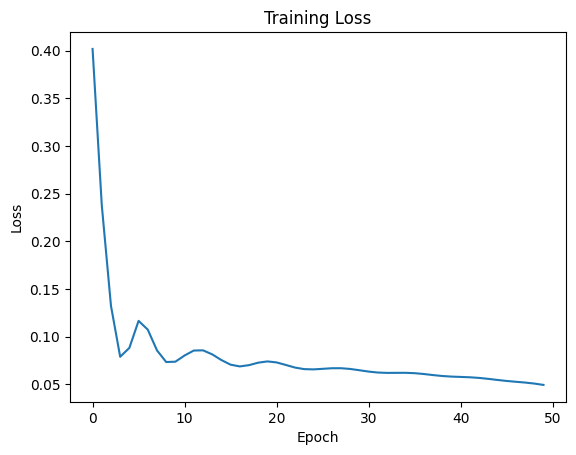

In [7]:
plt.plot(losses)
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()


# **Prediction vs Real graph**

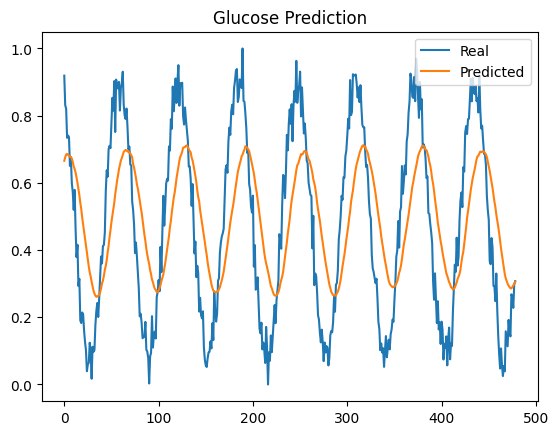

In [8]:
model.eval()
with torch.no_grad():
    preds, attn = model(X)

plt.plot(y.numpy(), label="Real")
plt.plot(preds.numpy(), label="Predicted")
plt.legend()
plt.title("Glucose Prediction")
plt.show()


# **Attention heatmap**

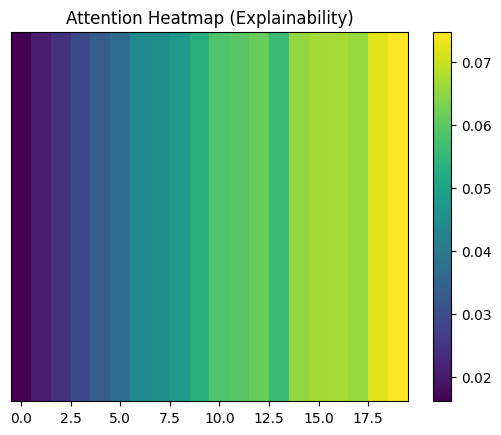

In [9]:
attn_sample = attn[0].detach().numpy().flatten()

plt.imshow(attn_sample.reshape(1, -1), aspect="auto")
plt.colorbar()
plt.title("Attention Heatmap (Explainability)")
plt.yticks([])
plt.show()


# **Prototype Summary**
**Model**: Attention-based GRU for multimodal glucose prediction
Inputs used: CGM glucose, insulin dosage, carbohydrate intake
Capabilities demonstrated:
- Short-term glucose forecasting
- Multimodal temporal learning
- Attention-based explainability

**Learning outcome**:
This prototype shows my ability to implement interpretable multimodal
deep learning models for healthcare prediction tasks inspired by
the GlucoNet-MM research direction.
